<a href="https://colab.research.google.com/github/wakamori-k/Processing/blob/master/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 最小二乗法
# ヨビノリさん動画：https://www.youtube.com/watch?v=Zz1sgYxrA-k&index=3&list=PLDJfzGjtVLHmx7qMP410-9gx0weC9d90X
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

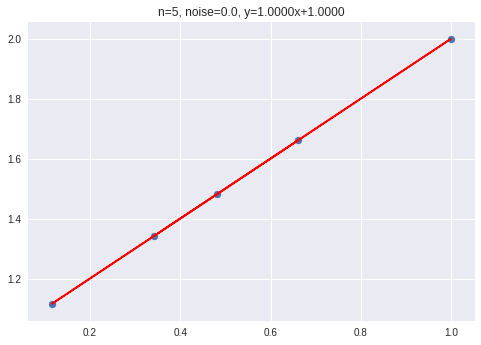

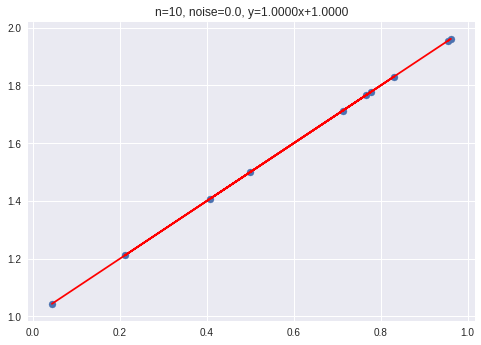

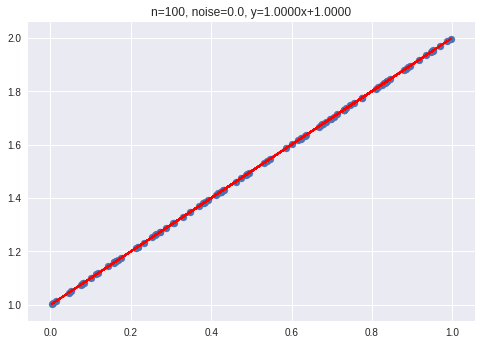

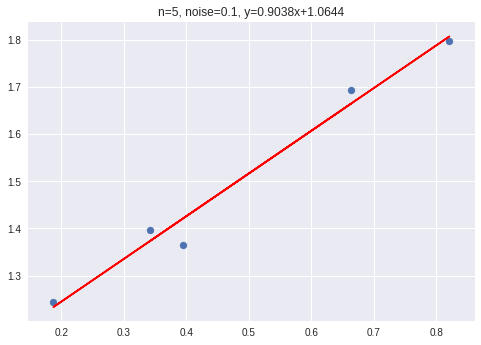

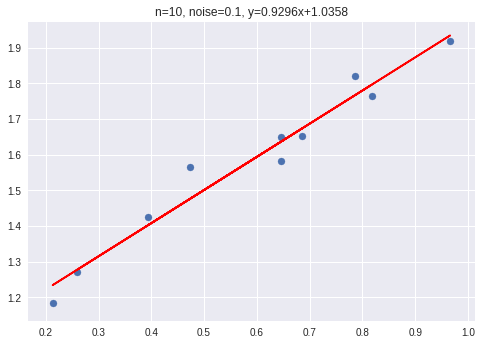

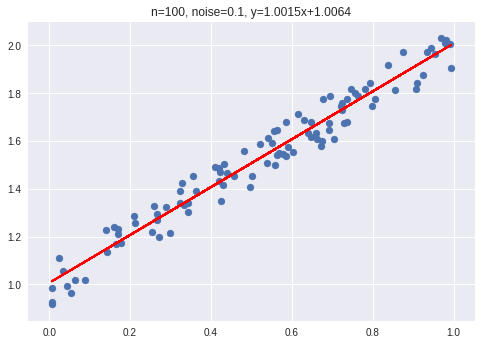

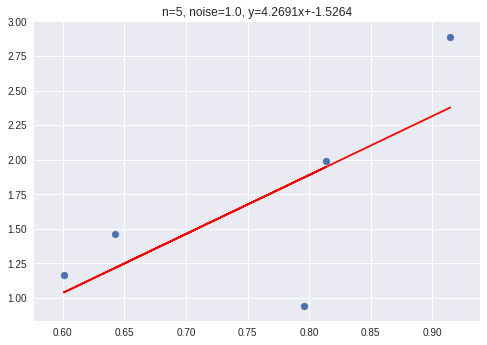

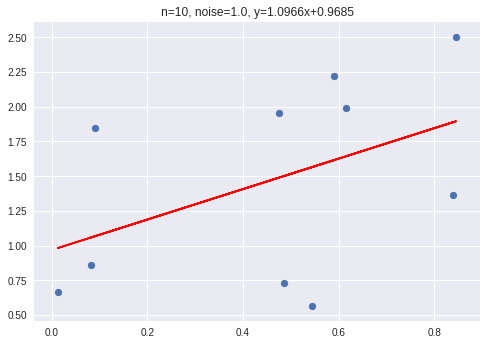

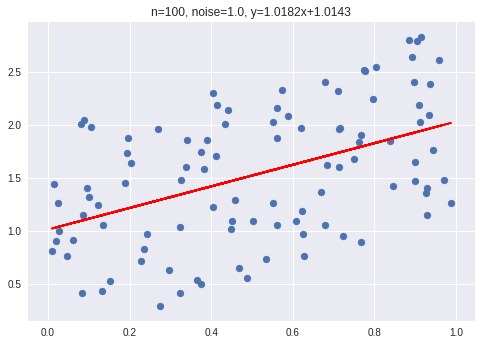

In [106]:
# 真の関数（求めたいaとb）
def f(x):
  a = 1.0
  b = 1.0
  return a*x + b

# 最小二乗法
def lqm(x, y):
  a = ((x*y).mean() - x.mean() * y.mean()) / ((x**2).mean() - x.mean()**2)
  b = -a*x.mean() + y.mean()
  return a, b

noise_range_list = [0, 0.1, 1] # ノイズの大きさ
n_data_list = [5, 10, 100] # データ数

# ノイズの大きさ、データ数ごとに、最小二乗法を実行
for noise_range in noise_range_list:
  for n_data in n_data_list:
    # x: 乱数でサンプリング
    x = np.random.rand(n_data)
    # y: -noise_range ~ noise_rangeの範囲のノイズ（一様分布）を含む
    y = np.array([f(xi) for xi in x]) + (np.random.rand(n_data)*2-1)*noise_range

    plt.scatter(x,y)
    a, b = lqm(x, y)
    plt.plot(x, [a*xi+b for xi in x], color="red")
    plt.title("n=%d, noise=%0.1f, y=%0.4fx+%0.4f" % (n_data, noise_range, a, b))
    plt.show()
    plt.close()
    
#　結果: ノイズが大きくても、データ数が多いほど、真の関数に近い結果が得られます